<a href="https://colab.research.google.com/github/manoj-shukla/DeepLearning/blob/master/CNN_DOGVsCAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google storage for Dataset


In [31]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2020-06-06 23:10:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 2607:f8b0:400c:c0c::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   105MB/s    in 0.6s    

2020-06-06 23:10:09 (105 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
#Train & Validation Directory
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
#Train Data
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')
#Validation Data
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')

In [0]:
train_dog_fnames = os.listdir(train_dogs_dir)
train_cat_fnames = os.listdir(train_cats_dir)


In [35]:
print("Total training cats images.", len(os.listdir(train_cats_dir)))
print("Total training dogs images.", len(os.listdir(train_dogs_dir)))
print("Total validation cats images.", len(os.listdir(validation_cats_dir)))
print("Total validation dogs images.", len(os.listdir(validation_dogs_dir)))

Total training cats images. 1000
Total training dogs images. 1000
Total validation cats images. 500
Total validation dogs images. 500


In [0]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

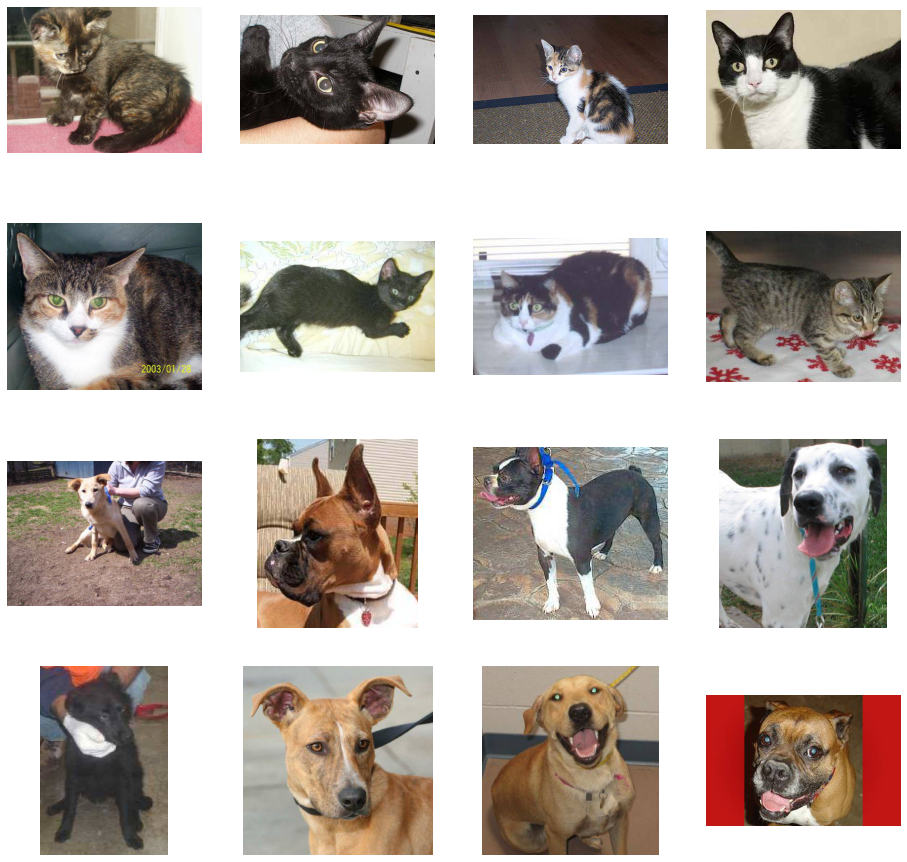

In [38]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([  
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')                                  
])

In [41]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [0]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255. )
test_datagen = ImageDataGenerator(rescale=1.0/255. )

In [45]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(150,150))
test_generator = test_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary', target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:
history = model.fit(train_generator, validation_data=test_generator, steps_per_epoch=100, epochs=15, validation_steps=50, verbose=2)

Epoch 1/15
100/100 - 45s - loss: 0.7375 - accuracy: 0.5605 - val_loss: 0.6586 - val_accuracy: 0.6050
Epoch 2/15
100/100 - 45s - loss: 0.6101 - accuracy: 0.6790 - val_loss: 0.6331 - val_accuracy: 0.6150
Epoch 3/15
100/100 - 45s - loss: 0.5351 - accuracy: 0.7330 - val_loss: 0.5703 - val_accuracy: 0.7120
Epoch 4/15
100/100 - 44s - loss: 0.4596 - accuracy: 0.7935 - val_loss: 0.6096 - val_accuracy: 0.6960
Epoch 5/15
100/100 - 44s - loss: 0.3659 - accuracy: 0.8400 - val_loss: 0.6720 - val_accuracy: 0.7080
Epoch 6/15
100/100 - 44s - loss: 0.2891 - accuracy: 0.8835 - val_loss: 0.6330 - val_accuracy: 0.7020
Epoch 7/15
100/100 - 44s - loss: 0.2118 - accuracy: 0.9150 - val_loss: 0.8578 - val_accuracy: 0.6910
Epoch 8/15
100/100 - 44s - loss: 0.1435 - accuracy: 0.9455 - val_loss: 0.9823 - val_accuracy: 0.7040
Epoch 9/15
100/100 - 44s - loss: 0.0851 - accuracy: 0.9710 - val_loss: 1.5622 - val_accuracy: 0.6810
Epoch 10/15
100/100 - 44s - loss: 0.0722 - accuracy: 0.9735 - val_loss: 1.4217 - val_accura

In [50]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

Saving dog02.jpeg to dog02.jpeg
[0.]
dog02.jpeg is a cat


In [0]:
model.save(base_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /tmp/cats_and_dogs_filtered/assets
